**CSE 578: DATA VISUALIZATION PROJECT**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import all necessary libraries

import pandas as pd       # For data manipulation
import numpy as np        # For numerical operations
import seaborn as sns     # For plotting
import matplotlib.pyplot as plt  # For plotting
%matplotlib inline
!pip install statsmodels
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from collections import Counter

In [ ]:
plt.rcParams.update({'font.size': 10, 'axes.titlesize': 12, 'axes.labelsize': 11, 'xtick.labelsize': 10, 'ytick.labelsize': 10, 'legend.fontsize': 10})

Importing data

In [ ]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

data = pd.read_csv('/content/drive/MyDrive/adult.csv', header=None, names=columns)
data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.shape

(32561, 15)

Data Cleaning

In [ ]:
# Strip whitespace from text columns
text_columns = data.select_dtypes(include='object').columns
data[text_columns] = data[text_columns].apply(lambda x: x.str.strip())

# Replace '?' with NaN
print("\nColumns with '?' before replacement:")
print((data == '?').sum())
data[text_columns] = data[text_columns].replace('?', pd.NA)

# Drop rows with missing values
rows_before = len(data)
data.dropna(inplace=True)
print(f"\nDropped {rows_before - len(data)} rows ({((rows_before - len(data)) / rows_before) * 100:.1f}%)")


Columns with '?' before replacement:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Dropped 2399 rows (7.4%)


In [ ]:
# Drop fnlwgt column
data.drop(columns=['fnlwgt'], inplace=True)
print("\nColumns after dropping fnlwgt:", data.columns.tolist())


Columns after dropping fnlwgt: ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [ ]:
# Data Summary
print("\nDataset Info:")
print("-" * 40)
data.info()

print("\nSummary Statistics (Numerical Columns):")
print("-" * 40)
print(data.describe())

print("\nCategorical Columns Summary:")
print("-" * 40)
for col in data.select_dtypes(include='object').columns:
    print(f"\n{col} value counts:")
    print(data[col].value_counts())

print("\nNull Values per Column:")
print("-" * 40)
print(data.isnull().sum())

print("\nDuplicate Rows Count:")
print("-" * 40)
duplicates_before = data.duplicated().sum()
print("Total duplicates:", duplicates_before)
data.drop_duplicates(inplace=True)
print("Duplicates after removal:", data.duplicated().sum())



Dataset Info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   education       30162 non-null  object
 3   education-num   30162 non-null  int64 
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   capital-gain    30162 non-null  int64 
 10  capital-loss    30162 non-null  int64 
 11  hours-per-week  30162 non-null  int64 
 12  native-country  30162 non-null  object
 13  income          30162 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB

Summary Statistics (Numerical Columns):
----------------------------------------
    

In [ ]:
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 10
sns.set_theme(style="whitegrid")
label_fontsize = 12
title_fontsize = 14

In [ ]:
data['income'] = data['income'].str.strip().str.rstrip('.')
# Print unique income values to verify
print("Unique income values:", data['income'].unique())

Unique income values: ['<=50K' '>50K']


In [ ]:
income_values = data['income'].unique()
high_income = [v for v in income_values if '>' in v][0]  # e.g., '>50K'
low_income = [v for v in income_values if '<=' in v][0]  # e.g., '<=50K'

**EXPLORATORY DATA ANALYSIS**

**Univariate Analysis**

Age vs Income

In [ ]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

<ipython-input-331-017c9725a204>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




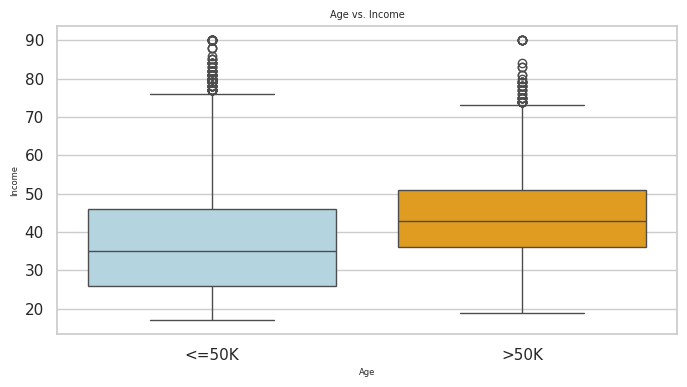

In [ ]:
sns.boxplot(x=data['income'], y=data['age'], palette=['lightblue', 'orange'])
plt.ylabel('Income', fontsize=6)
plt.xlabel('Age', fontsize=6)
plt.title('Age vs. Income', fontsize=7)
plt.show()

Occupation vs Income

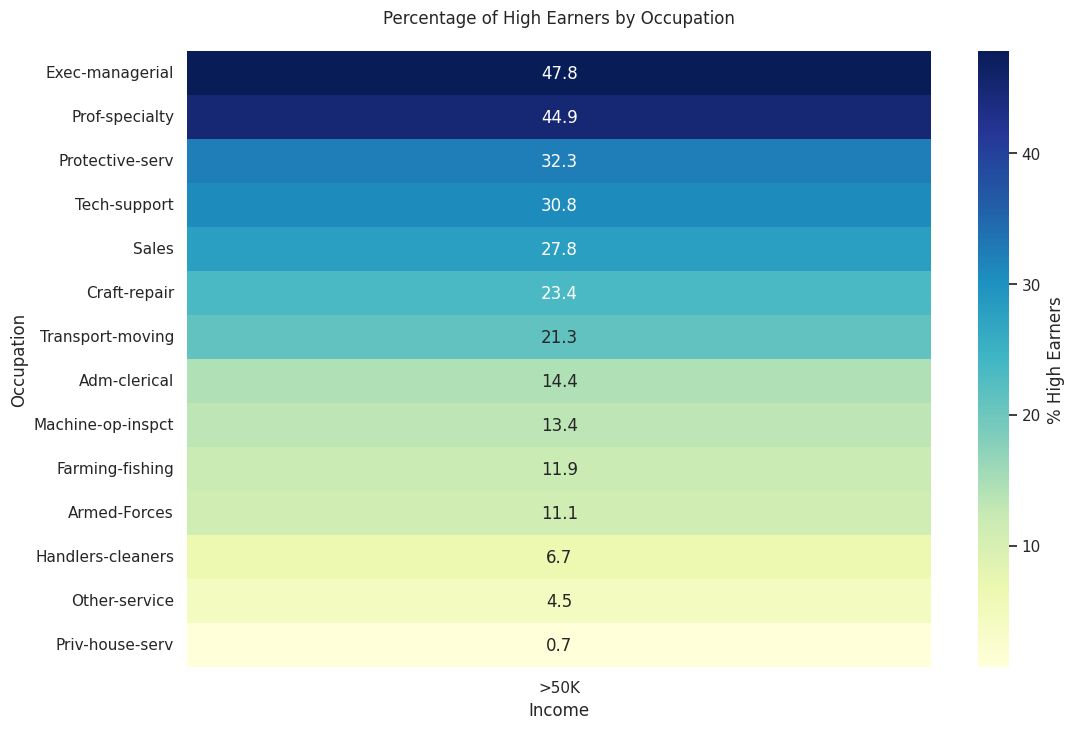

In [ ]:
occupation_income = pd.crosstab(
    index=data['occupation'],
    columns=data['income'],
    normalize='index'
).sort_values('>50K', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(
    occupation_income[['>50K']]*100,
    annot=True,
    cmap='YlGnBu',
    fmt='.1f',
    cbar_kws={'label': '% High Earners'}
)
plt.title('Percentage of High Earners by Occupation', pad=20)
plt.xlabel('Income')
plt.ylabel('Occupation')
plt.xticks(rotation=0)
plt.show()

Race vs Income

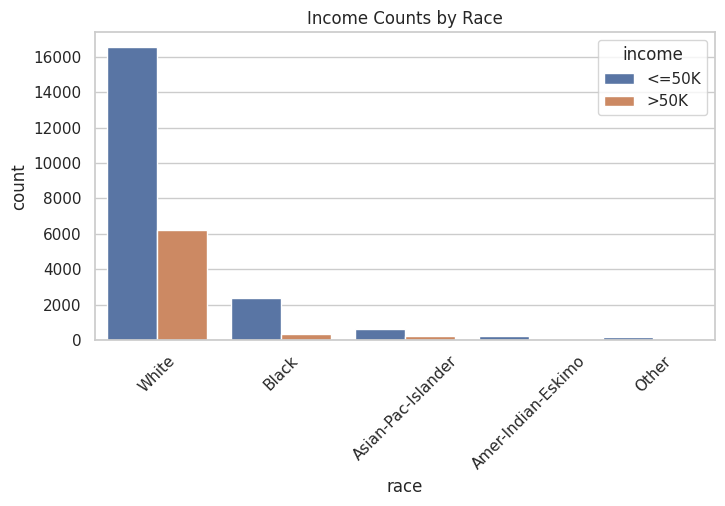

In [ ]:
import seaborn as sns
sns.countplot(x='race', hue='income', data=data)
plt.title('Income Counts by Race')
plt.xticks(rotation=45)
plt.show()

Sex vs Salary

<Figure size 100x100 with 0 Axes>

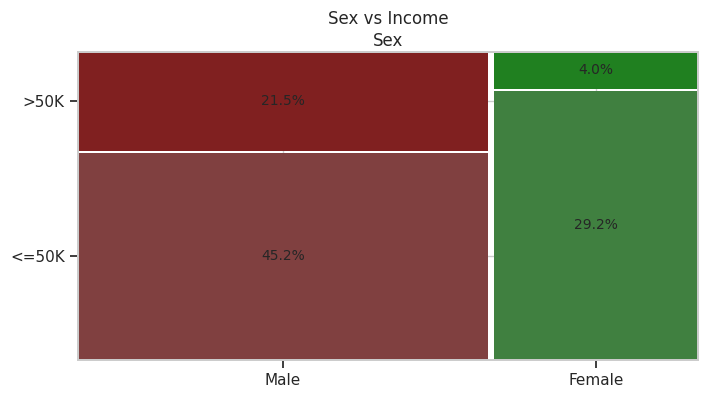

In [ ]:
# Count combinations of sex and income
counts = Counter(zip(data['sex'], data['income']))
total = sum(counts.values())

# Label each cell
labelizer = lambda key: f"{counts[key] / total * 100:.1f}%"

# Create mosaic plot
plt.figure(figsize=(1, 1))
mosaic(counts, index=[0, 1], labelizer=labelizer, gap=0.01)

# Add title and labels
plt.title('Sex vs Income')
plt.xlabel('Sex')
plt.ylabel('Income')
plt.show()

Country vs Income

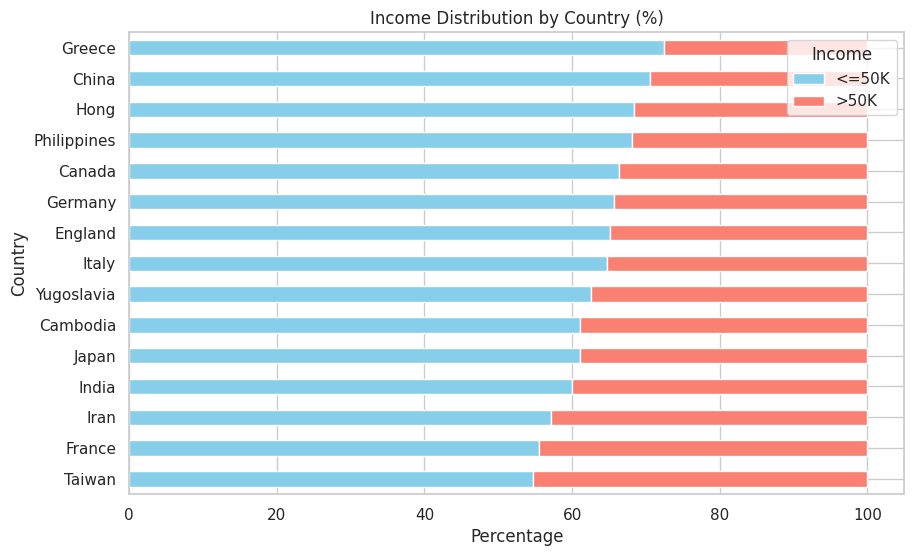

In [ ]:
# Calculate percentages
country_pct = (data.groupby('native-country')['income']
                .value_counts(normalize=True)
                .unstack()
                .mul(100)
                .sort_values('>50K', ascending=False)
                .head(15))  # Top 15 countries

# Plot
country_pct.plot(kind='barh', stacked=True, color=['skyblue', 'salmon'], figsize=(10,6))
plt.title('Income Distribution by Country (%)')
plt.xlabel('Percentage')
plt.ylabel('Country')
plt.legend(title='Income')
plt.show()

User Story 1: Education vs Income

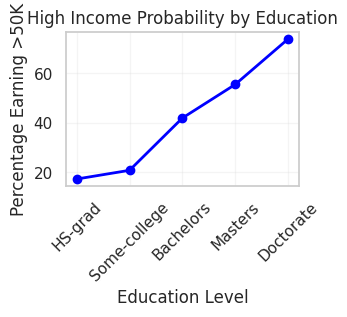

In [ ]:
import matplotlib.pyplot as plt

# Calculate percentage high income by education
education_income = data.groupby('education')['income'].apply(
    lambda x: (x == '>50K').mean() * 100
)

# Sort education levels logically
education_order = ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Doctorate']
education_income = education_income.loc[education_order]

# Create plot
plt.figure(figsize=(3,2))
plt.plot(education_income.index, education_income.values,
         marker='o', color='blue', linewidth=2)

# Add labels
plt.title('High Income Probability by Education')
plt.xlabel('Education Level')
plt.ylabel('Percentage Earning >50K')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.2)

plt.show()

**MULTIVARIATE ANALYSIS**

User story 2: Race, Education vs Income

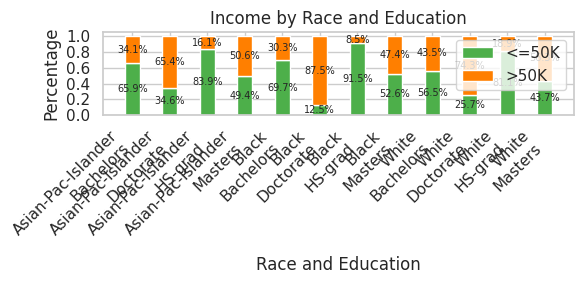

In [ ]:
# Stacked Bar Plot for Race, Education, and Income
key_races = ['White', 'Black', 'Asian-Pac-Islander']
key_educations = ['HS-grad', 'Bachelors', 'Masters', 'Doctorate']
plot_data = data[data['race'].isin(key_races) & data['education'].isin(key_educations)]

# Calculate proportions
grouped = plot_data.groupby(['race', 'education', 'income']).size().unstack(fill_value=0)
grouped['total'] = grouped['<=50K'] + grouped['>50K']
grouped['prop_low'] = grouped['<=50K'] / grouped['total']
grouped['prop_high'] = grouped['>50K'] / grouped['total']
plot_data = grouped[['prop_low', 'prop_high']].reset_index()

# Create labels
labels = [f"{r}\n{e}" for r, e in plot_data[['race', 'education']].values]

# Plot
xpos = np.arange(len(labels))
plt.figure(figsize=(6, 3))
barwidth = 0.4
plt.bar(xpos, plot_data['prop_low'], width=barwidth, label='<=50K', color='#4daf4a')  # Green
plt.bar(xpos, plot_data['prop_high'], bottom=plot_data['prop_low'], width=barwidth, label='>50K', color='#ff7f00')  # Orange

# Add percentage labels
for i, (low, high) in enumerate(zip(plot_data['prop_low'], plot_data['prop_high'])):
    if low > 0:
        plt.text(i, low / 2, f'{low*100:.1f}%', ha='center', va='center', fontsize=7)
    if high > 0:
        plt.text(i, low + high / 2, f'{high*100:.1f}%', ha='center', va='center', fontsize=7)

plt.xticks(xpos, labels, rotation=45, ha='right')
plt.xlabel('Race and Education')
plt.ylabel('Percentage')
plt.title('Income by Race and Education')
plt.legend()
plt.yticks(np.linspace(0, 1, 6))
plt.tight_layout()
plt.savefig('race_education_income_stacked_bar.png', dpi=300)
plt.show()

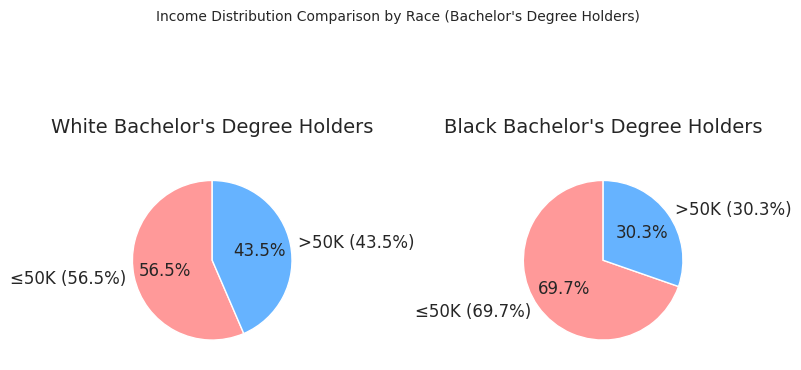

In [ ]:
import matplotlib.pyplot as plt

# Filter data for White and Black bachelor's degree holders
focus_data = data[(data['race'].isin(['White', 'Black'])) &
                 (data['education'] == 'Bachelors')].copy()

# Calculate income proportions
grouped = focus_data.groupby(['race', 'income']).size().unstack(fill_value=0)
grouped['total'] = grouped['<=50K'] + grouped['>50K']
grouped['prop_low'] = grouped['<=50K'] / grouped['total']
grouped['prop_high'] = grouped['>50K'] / grouped['total']

# Create figure with two subplots
plt.figure(figsize=(8, 4))

# White Bachelor's pie chart
plt.subplot(1, 2, 1)
sizes_white = [grouped.loc['White']['prop_low'], grouped.loc['White']['prop_high']]
labels_white = [f"≤50K ({sizes_white[0]*100:.1f}%)", f">50K ({sizes_white[1]*100:.1f}%)"]
plt.pie(sizes_white, labels=labels_white, autopct='%1.1f%%', startangle=90,
        colors=['#ff9999','#66b3ff'], textprops={'fontsize': 12})
plt.title('White Bachelor\'s Degree Holders', fontsize=14, pad=20)

# Black Bachelor's pie chart
plt.subplot(1, 2, 2)
sizes_black = [grouped.loc['Black']['prop_low'], grouped.loc['Black']['prop_high']]
labels_black = [f"≤50K ({sizes_black[0]*100:.1f}%)", f">50K ({sizes_black[1]*100:.1f}%)"]
plt.pie(sizes_black, labels=labels_black, autopct='%1.1f%%', startangle=90,
        colors=['#ff9999','#66b3ff'], textprops={'fontsize': 12})
plt.title('Black Bachelor\'s Degree Holders', fontsize=14, pad=20)

plt.suptitle('Income Distribution Comparison by Race (Bachelor\'s Degree Holders)',
             fontsize=10, y=1.05)
plt.tight_layout()
plt.show()

User Story 3: Native-Country, Occupation vs Income

<ipython-input-350-a0a0f2a7020c>:27: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



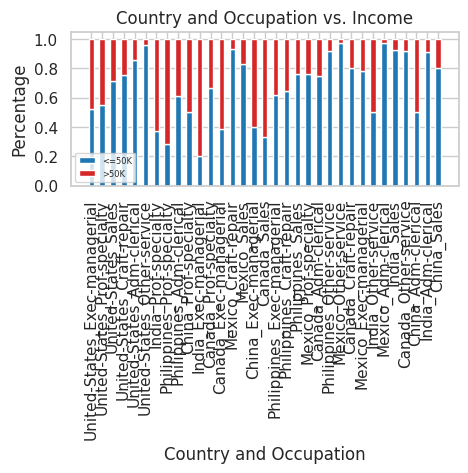

In [ ]:
# Visualization 2: Native-Country, Occupation, and Income (Stacked Bar Plot)
plot_data = data[data['native-country'].isin(['United-States', 'India', 'China', 'Mexico', 'Canada', 'Philippines']) &
                data['occupation'].isin(data['occupation'].value_counts().head(6).index)]
counts_hi = plot_data.loc[plot_data['income'] == '>50K', ['native-country', 'occupation']].value_counts()
counts_li = plot_data.loc[plot_data['income'] == '<=50K', ['native-country', 'occupation']].value_counts()
labels = [f"{c}_{o}" for c, o in counts_hi.index]
hi_v = []
li_v = []
for c, o in counts_hi.index:
    hi_count = counts_hi.get((c, o), 0)
    li_count = counts_li.get((c, o), 0)
    total = hi_count + li_count
    hi_v.append(hi_count / total if total > 0 else 0)
    li_v.append(li_count / total if total > 0 else 0)

xpos = np.arange(len(labels))
plt.figure(figsize=(5, 2))
barwidth = 0.5
plt.bar(xpos, li_v, width=barwidth, label='<=50K', color='#1f77b4')
plt.bar(xpos, hi_v, bottom=li_v, width=barwidth, label='>50K', color='#d62728')
plt.xticks(xpos, labels, rotation='vertical')
plt.xlabel('Country and Occupation')
plt.ylabel('Percentage')
plt.title('Country and Occupation vs. Income')
plt.legend(fontsize=6)
plt.yticks(np.linspace(0, 1, 6))
plt.tight_layout()
plt.savefig('nativecountry_occupation_income.png', dpi=300)
plt.show()

User Story 4 : Sex, Workclass vs High Income

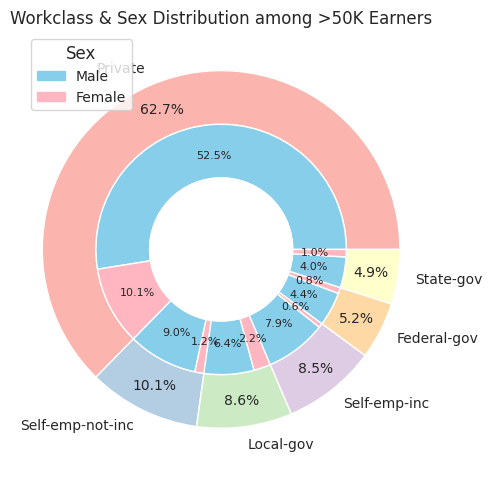

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# Outer ring: workclass distribution
wc = high['workclass'].value_counts()
labels, sizes_outer = wc.index.tolist(), wc.values.tolist()

# Inner ring: sex split per workclass
sizes_inner = []
for w in labels:
    grp = high[high['workclass'] == w]
    sizes_inner.extend([grp[grp['sex'] == 'Male'].shape[0],
                        grp[grp['sex'] == 'Female'].shape[0]])

# Colors
outer_colors = plt.cm.Pastel1(range(len(labels)))
inner_colors = ['skyblue','lightpink'] * len(labels)

# Plot
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(
    sizes_outer, labels=labels, radius=1,
    wedgeprops=dict(width=0.3, edgecolor='white'),
    autopct='%1.1f%%', pctdistance=0.85,
    colors=outer_colors, textprops={'fontsize':10}
)
ax.pie(
    sizes_inner, radius=0.7,
    wedgeprops=dict(width=0.3, edgecolor='white'),
    autopct='%1.1f%%', pctdistance=0.75,
    colors=inner_colors, textprops={'fontsize':8}
)

# Center circle
centre = plt.Circle((0,0),0.4, color='white')
ax.add_artist(centre)

# Legend for sex
legend_patches = [
    mpatches.Patch(color='skyblue', label='Male'),
    mpatches.Patch(color='lightpink', label='Female')
]
ax.legend(handles=legend_patches, title='Sex', loc='upper left', fontsize=10)

# Title
ax.set_title('Workclass & Sex Distribution among >50K Earners', fontsize=12)
ax.axis('equal')
plt.tight_layout()
plt.show()


User Story 5: Marital status, Sex vs Income

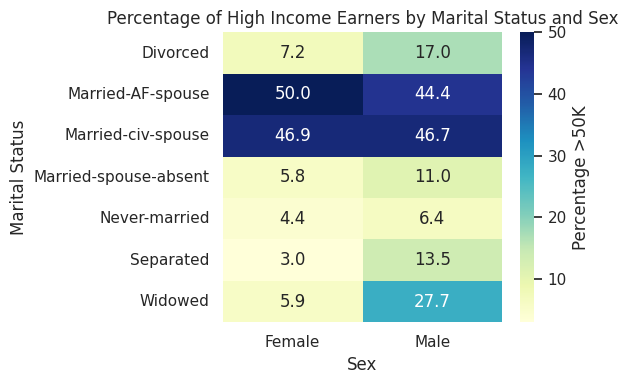

In [ ]:
cross_tab = pd.crosstab(
    index=[data['marital-status'], data['sex']],
    columns=data['income'],
    normalize='index'
)

plt.figure(figsize=(6, 4))
sns.heatmap(cross_tab['>50K'].unstack()*100,
            annot=True,
            fmt='.1f',
            cmap='YlGnBu',
            cbar_kws={'label': 'Percentage >50K'})
plt.title('Percentage of High Income Earners by Marital Status and Sex')
plt.xlabel('Sex')
plt.ylabel('Marital Status')
plt.tight_layout()
plt.show()

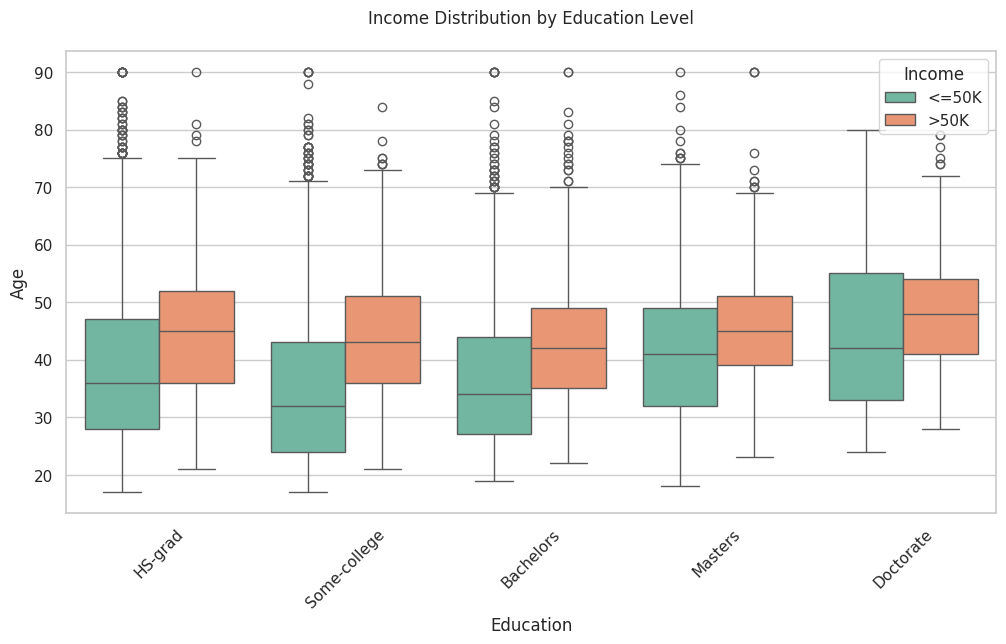

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='education',
    y='age',
    hue='income',
    data=data,
    order=['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Doctorate'],
    palette=['#66c2a5', '#fc8d62']
)
plt.title('Income Distribution by Education Level', pad=20)
plt.xlabel('Education')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()